# Script Contents
#### .01 Import libraries and data
#### .02 Remove categorical columns
#### .03 Standardize data
#### .04 Elbow technique
#### .05 Decide on number of clusters
#### .06 Run the k-means algorithm
#### .07 Create a clusters column
#### .08 Visualize different variables implementing clusters
#### .09 Discuss clusters
#### .10 Calculate descriptive stats for clusters and discuss results
#### .11 Discuss future analysis based on cluster results

## .01 Import Libraries and Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [4]:
# Enables the rendering of Matplotlib plots directly below code cells
%matplotlib inline

In [5]:
# define path
path = r"C:\Users\jacks\Portugese Real Estate Analysis"

In [6]:
# Importing data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'portugal_housing_cleaned.pkl'))

## .02 The k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data

In [8]:
df.head()

,Price,District,City,Town,Type,EnergyCertificate,Parking,HasParking,ConstructionYear,TotalArea,TotalRooms,NumberOfBedrooms,NumberOfWC,LivingArea,NumberOfBathrooms
0,250000,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,1,True,1992,114,2,1,0,114,2
1,9500,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,0,False,1990,27,3,2,0,27,1
2,580000,Faro,Vila do Bispo,Budens,Apartment,D,1,True,2003,84,2,1,0,84,2
3,350000,Faro,Portimão,Portimão,Apartment,C,0,False,1985,68,2,1,0,68,1
4,175000,Faro,Faro,Faro (Sé e São Pedro),House,NC,0,False,1950,78,4,2,0,78,2


In [9]:
# Dropping non-numeric columns
df_num = df.drop(['District','City','Town','Type','EnergyCertificate','HasParking'], axis=1)

In [10]:
df_num.head()

,Price,Parking,ConstructionYear,TotalArea,TotalRooms,NumberOfBedrooms,NumberOfWC,LivingArea,NumberOfBathrooms
0,250000,1,1992,114,2,1,0,114,2
1,9500,0,1990,27,3,2,0,27,1
2,580000,1,2003,84,2,1,0,84,2
3,350000,0,1985,68,2,1,0,68,1
4,175000,0,1950,78,4,2,0,78,2


## .03 The difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first

In [12]:
# Importing a method for standardizing the data
from sklearn.preprocessing import StandardScaler

In [13]:
# Define standard scaler 
scaler = StandardScaler() 

In [14]:
# Transform data 
df_num = scaler.fit_transform(df_num)

In [15]:
# Convert to a DataFrame
df_num = pd.DataFrame(df_num)

In [16]:
df_num.head()

,0,1,2,3,4,5,6,7,8
0,-0.178909,0.438005,0.234850,-0.008389,-0.396649,-0.653096,-0.317317,-0.064532,0.265702
1,-0.551584,-0.675659,0.146623,-0.008408,0.055503,0.062293,-0.317317,-0.068154,-0.323644
2,0.332454,0.438005,0.720096,-0.008396,-0.396649,-0.653096,-0.317317,-0.065781,0.265702
3,-0.023950,-0.675659,-0.073943,-0.008399,-0.396649,-0.653096,-0.317317,-0.066447,-0.323644
4,-0.295127,-0.675659,-1.617908,-0.008397,0.507655,0.062293,-0.317317,-0.066031,0.265702


In [17]:
# Dropping non-numeric columns again from original df to get column names for df_num
df_int = df.drop(['District','City','Town','Type','EnergyCertificate','HasParking'], axis=1)

In [18]:
# Assign column names from df_int to df_num
df_num.columns = df_int.columns

In [19]:
df_num.head()

,Price,Parking,ConstructionYear,TotalArea,TotalRooms,NumberOfBedrooms,NumberOfWC,LivingArea,NumberOfBathrooms
0,-0.178909,0.438005,0.234850,-0.008389,-0.396649,-0.653096,-0.317317,-0.064532,0.265702
1,-0.551584,-0.675659,0.146623,-0.008408,0.055503,0.062293,-0.317317,-0.068154,-0.323644
2,0.332454,0.438005,0.720096,-0.008396,-0.396649,-0.653096,-0.317317,-0.065781,0.265702
3,-0.023950,-0.675659,-0.073943,-0.008399,-0.396649,-0.653096,-0.317317,-0.066447,-0.323644
4,-0.295127,-0.675659,-1.617908,-0.008397,0.507655,0.062293,-0.317317,-0.066031,0.265702


## .04 Use the elbow technique

In [21]:
# Define the range of potential clusters in the data
num_cl = range(1, 10)
# Define k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [22]:
# Create a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))] 

score

[-895283.9999999991,
 -803080.6961501302,
 -653540.8291079925,
 -561342.2327981468,
 -522966.71550634404,
 -509657.7547288931,
 -418156.1097013674,
 -387163.2802214161,
 -358405.2741718683]

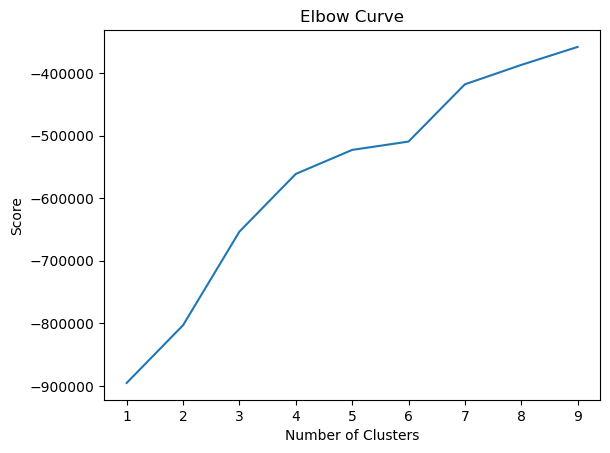

In [23]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### There is no exact elbow in the chart but the chart does appear to flatten some at 3 clusters then again at 5 clusters. 

## .05 Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart

#### Based on the elbow chart, I will use 3 clusters in the k-means algorithm. Although the elbow does not completely flatten at 3 clusters, there isn't flattening again until 5 clusters and 5 or more clusters is too many for each cluster to have an effective size in the k-means algorithm. 

## .06 Run the k-means algorithm

In [28]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3)

In [29]:
# Fit the k-means object to the data.
kmeans.fit(df_num)

KMeans(n_clusters=3)

## .07 Attach a new column to your dataframe with the resulting clusters

In [31]:
df_num['clusters'] = kmeans.fit_predict(df_num)

In [32]:
df_num.head()

,Price,Parking,ConstructionYear,TotalArea,TotalRooms,NumberOfBedrooms,NumberOfWC,LivingArea,NumberOfBathrooms,clusters
0,-0.178909,0.438005,0.234850,-0.008389,-0.396649,-0.653096,-0.317317,-0.064532,0.265702,0
1,-0.551584,-0.675659,0.146623,-0.008408,0.055503,0.062293,-0.317317,-0.068154,-0.323644,1
2,0.332454,0.438005,0.720096,-0.008396,-0.396649,-0.653096,-0.317317,-0.065781,0.265702,0
3,-0.023950,-0.675659,-0.073943,-0.008399,-0.396649,-0.653096,-0.317317,-0.066447,-0.323644,1
4,-0.295127,-0.675659,-1.617908,-0.008397,0.507655,0.062293,-0.317317,-0.066031,0.265702,1


In [33]:
df_num['clusters'].value_counts()

clusters
1    57612
0    34355
2     7509
Name: count, dtype: int64

## .08 Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters

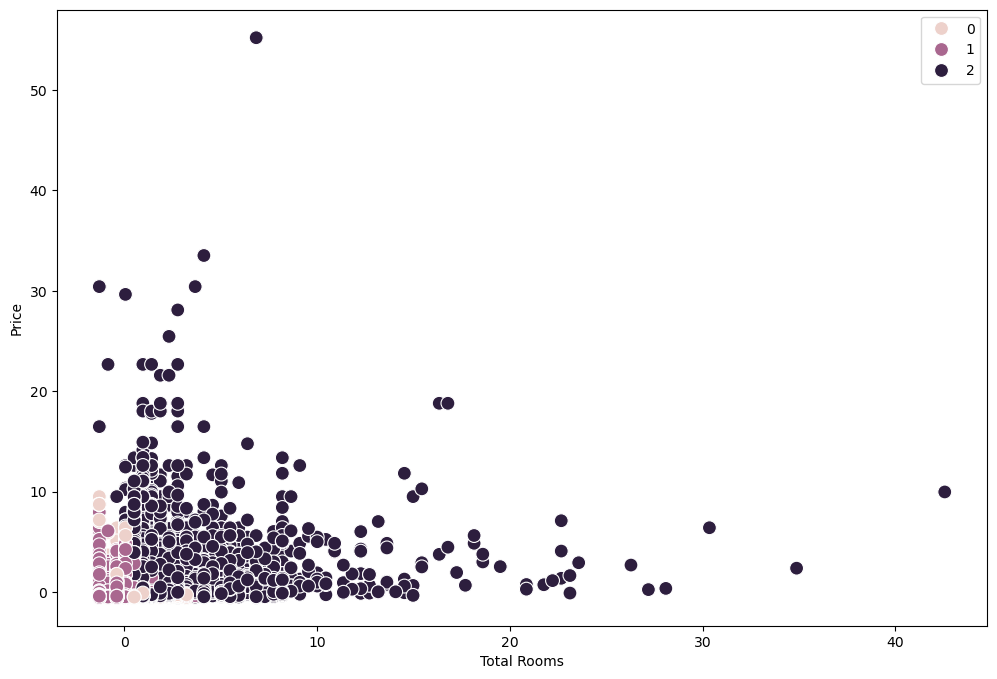

In [35]:
# Plot the clusters for the "Price" and "Total Rooms" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['TotalRooms'], y=df_num['Price'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Total Rooms') 
plt.ylabel('Price') 
plt.show()

#### Cluster 0 appears to be mostly properties with several total rooms and low to moderate prices. Cluster 1 appears to be properties with few total rooms and mostly low but some moderate prices. Cluster 3 appears to be mostly properties with moderate to many total rooms and low to high pricing. Cluster 3 covers a wide rang of properties and includes what appear to be outliers.

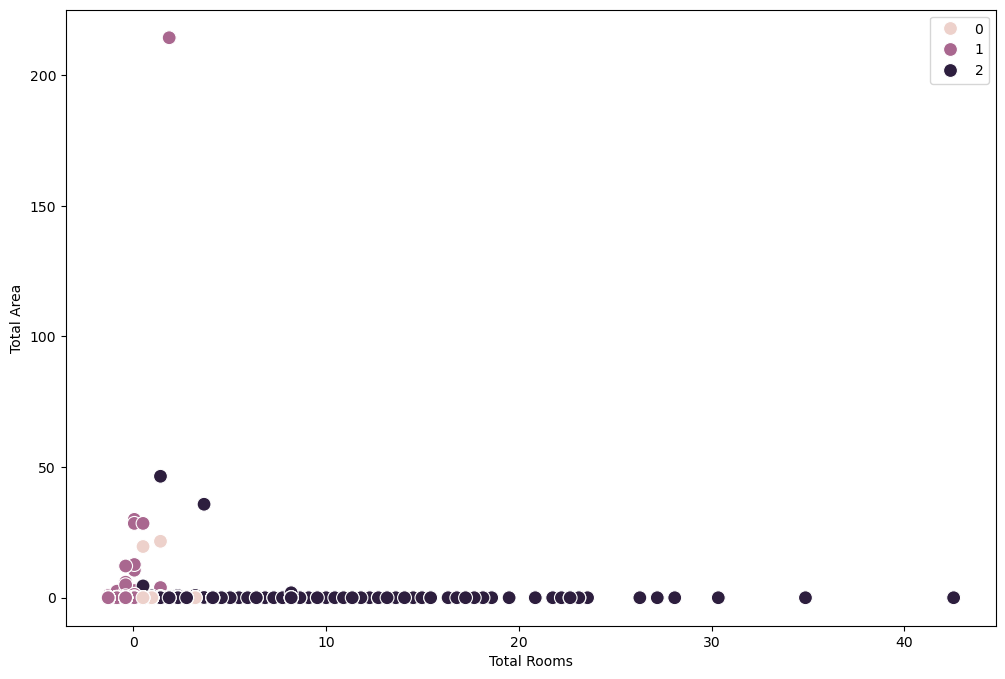

In [37]:
# Plot the clusters for the "Total Area" and "Total Rooms" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['TotalRooms'], y=df_num['TotalArea'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Total Rooms') 
plt.ylabel('Total Area') 
plt.show()

#### Cluster 0 appears to represent properties with a few total rooms a low to moderate total area. Cluster 1 appears to represent properties with very few total rooms and mostly very low total area. Cluster 2 appears to represent properties with moderate to high counts of total rooms and mostly very little total area. 

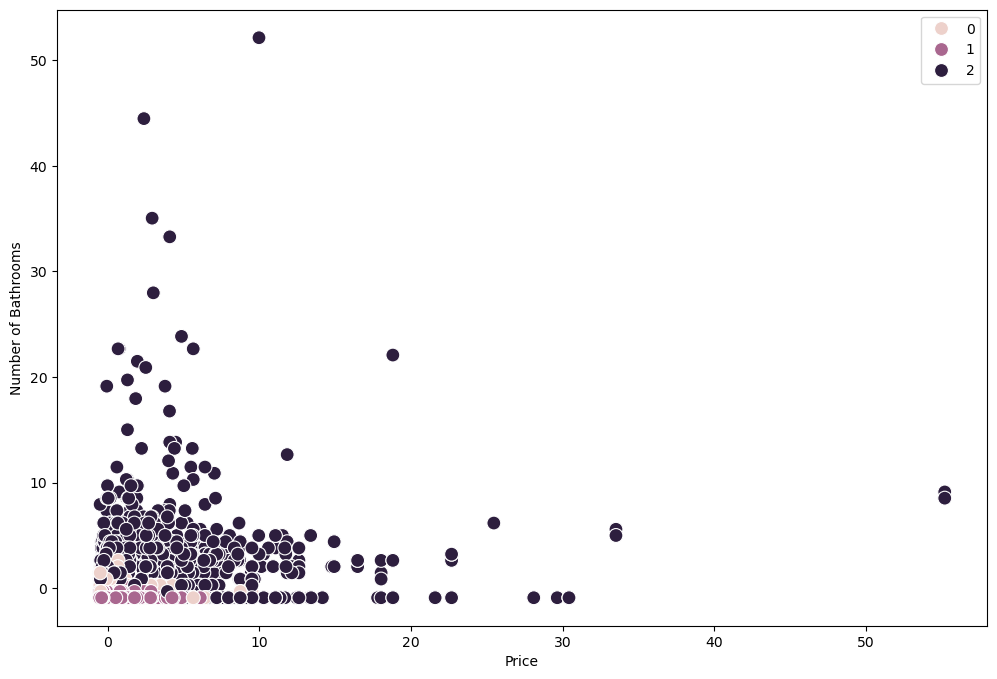

In [64]:
# Plot the clusters for the "Price" and "NUmber of bathrooms" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Price'], y=df_num['NumberOfBathrooms'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Price') 
plt.ylabel('Number of Bathrooms') 
plt.show()

#### Cluster 0 appears to represent properties with few bathrooms and low to moderate pricing. Cluster 1 appears to represent properties with very few bathrooms and low to moderate pricing. Cluster 2 appears to represent properties with both few bathrooms and moderate to high pricing as well as a moderate to high number of bathrooms with low to moderate pricing. 

## .09 Discuss how and why the clusters make sense

#### Cluster 1 consistenly represents properties in the lowest corner of the quadrant. There are some property features represented by cluster 1 that stray out of this corner, such as price and total area, but cluster 1 clearly represents properties with minimal features. Cluster 0 consistently represents properties that seem to be a step above cluster 1, such as properties with slightly more total rooms or for a slightly higher price. There is quite a bit of overlap between cluster 0 and 1 but cluster 0 is consistently grouped higher on both the x and y axes. Cluster 2 consistently represents properties with the highest x and y values, with the exception of a very high total area represented by cluster 1. Cluster 2 is generally concentrated just beyond the concentrations of cluster 0 but cluster 2 also captures many outliers. 

#### These clusters make sense because they consistently group properties in a similar way from one plot to the next. The clusters paint a fairly clear picture of the different types of properties available in the Portuguese real estate market. 

## .10 Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings

In [70]:
# Calculate descriptive statistics for each cluster
df_num.loc[df_num['clusters'] == 2, 'clusters'] = 'purple'
df_num.loc[df_num['clusters'] == 1, 'clusters'] = 'pink'
df_num.loc[df_num['clusters'] == 0, 'clusters'] = 'cream'

df_num.groupby('clusters').agg({
    'Price': ['mean', 'median'], 
    'Parking': ['mean', 'median'], 
    'ConstructionYear': ['mean', 'median'], 
    'TotalArea': ['mean', 'median'],
    'TotalRooms': ['mean', 'median'],
    'NumberOfBedrooms': ['mean', 'median'],
    'NumberOfWC': ['mean', 'median'],
    'LivingArea': ['mean', 'median'],
    'NumberOfBathrooms': ['mean', 'median'],
})


C:\Users\jacks\AppData\Local\Temp\ipykernel_12000\4272381196.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'purple' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_num.loc[df_num['clusters'] == 2, 'clusters'] = 'purple'


Price             Parking           ConstructionYear            \
              mean    median      mean    median             mean    median   
clusters                                                                      
cream     0.130220 -0.039446  0.853324  0.438005         0.699252  0.720096   
pink     -0.256374 -0.380355 -0.531261 -0.675659        -0.433251 -0.426849   
purple    1.371220  0.572640  0.171936 -0.675659         0.124875  0.367189   

         TotalArea           TotalRooms           NumberOfBedrooms            \
              mean    median       mean    median             mean    median   
clusters                                                                       
cream    -0.006375 -0.008380   0.114334  0.055503         0.214513  0.062293   
pink      0.003102 -0.008373  -0.336508 -0.396649        -0.397360 -0.653096   
purple    0.005365 -0.008349   2.058726  1.411960         2.067271  1.493073   

         NumberOfWC           LivingArea           NumberOfBathrooms            
               mean    median       mean    median              mean    median  
clusters                                                                        
cream      0.030031 -0.317317  -0.055431 -0.063824          0.470271  0.265702  
pink      -0.244544 -0.317317   0.032005 -0.062076         -0.510896 -0.323644  
purple     1.738846  1.161018   0.008049 -0.058621          1.768226  1.444395

#### The clusters' descriptive stats match what was seen in the visualizations. Cream appears to represent properties with moderate levels of attributes accross the board with the exception of parking, which is higher than any other cluster. Cream properties are likely moderately-sized homes in a suburban area with several parking spots. 

#### Pink properties have the lowest descriptive statistics with a few exceptions, such as total area and living area. Pink properties likely represent affordable properties, which are mostly small homes or apartments in affordable areas although they could also be larger homes with more land in remote areas. The high mean and low median of the total area and living area measurements indicate there are likely outliers in the pink cluster that are causing the mean to increase. 

#### Purple properties likely represent large homes, mansions, and commercial properties. Purple properties have the highest mean and median in nearly all measurements. As with pink properties, there are several measurements where the mean is much higher than the median, indicating outliers which pull up the value of the mean. As seen in the visualizations, purple tends to represent outliers, which would make sense with large properties' and commercial properties' tendencies to have unusual features such as a very high number of rooms or a large area of land. 

## .11 Propose what these results could be useful for in future steps of an analytics pipeline

#### These results could be useful for further exploring the relationships in each specific group identified by the clusters. For example, perhaps logistic regression could be used to test the relationship between parking and price in the cream cluster. The clusters could also be used to explore relationships with other variables, such as location. Perhaps cream properties indicate better property location when compared to pink clusters. Similarly, perhaps location has less affect on the price of purple properties due to their size.